<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Chintan N Ruparel

Roll No. -  C086

Division - C


---



# Aim - To use GMM to track an object in the given video.

In [ ]:
#For mathematical caculations.
import numpy as np

#To plot the image.
import matplotlib.pyplot as plt

#Computer vision version 2.
import cv2

from sklearn.mixture import  GaussianMixture

from skimage.color import rgb2gray

In [ ]:
cap=cv2.VideoCapture('/content/slow_traffic_small.mp4')
frames=[]
frame_count=0
while True:
  ret,frame=cap.read()
  if frame is not None :
    frame=cv2.resize(frame,(150,150))
    frames.append(frame)
    frame_count=frame_count+1
  else:
    break

In [ ]:
len(frames)

914

In [ ]:
frames=np.array(frames)


Text(0.5, 1.0, 'Frame 0')

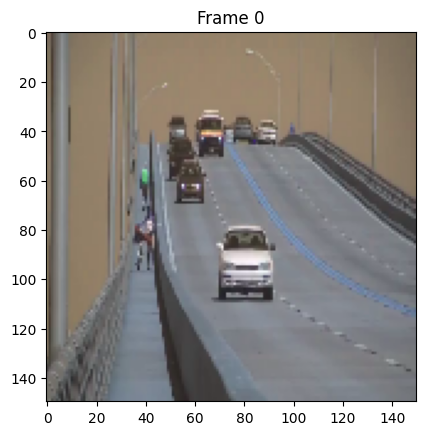

In [ ]:
plt.imshow(frames[0])
plt.title("Frame 0")

In [ ]:
sh=frames[0].shape
rw,col,ch=sh
rw,col,ch

(150, 150, 3)

In [ ]:
#the gmm consists of combination of 2 Gaussian Curves
gmm=GaussianMixture(n_components=2)
background=np.zeros((sh))
#running the loop to first 100 frames and then running a graph of 2 gaussian filters and then fit the model and save in temp.
for i in range(rw):
  for j in range(col):
    for k in range(ch):
      temp=frames[0:100,i,j,k]
      temp=temp.reshape(temp.shape[0],1)
      gmm.fit(temp)
      #taking out means after fitting the model
      means=gmm.means_
      #
      weights=gmm.weights_
      index=np.argmax(weights)
      background[i][j][k]=int(means[index][0])

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  .fit(X)
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:119: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to dup

Text(0.5, 1.0, 'Foreground')

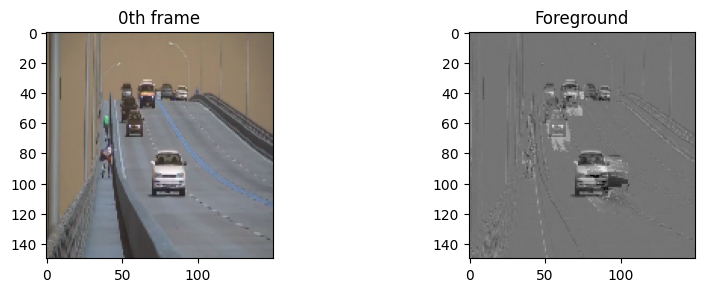

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(frames[0])
plt.title('0th frame')

foreground=frames[0]-background
foreground=rgb2gray(foreground)

plt.subplot(3,2,2)
plt.imshow(foreground,cmap='gray')
plt.title('Foreground')



##Conclusion
1. GMM is used to generate background using first 100 frames to determine foreground of each frame, background is subtracted from that frame which shows only moving objects.
2. Images of foreground for frames 0, 554, 213 are shown, it is observed that some of the background pixels are gray and not black which can be eliminated by applying a threshold
3. if the no. of components of GMM is increased from 2 to 4 it is expected that the quality of the background would be better.
4. Quality of background can be improved if all the frames of the video are considered by GMM